# Stratified Sampling

For this project, we have decided to use stratified sampling due to the categorical nature of our data. Stratified sampling consists of sampling a proportionate amount of data from each category (called Strata).

Essentially, this allows for a better representation of data in the train and test split. In the case of sampling from the Origin dataset, due to the fact that LAX (Los Angeles Int. Airport) has a substantially higher number of departing flights as compared to HOU (William P. Hobby Int. Airport), if we were to run a simple train test split, due to simple probability, HOU might not appear in either train or test. Furthermore, a disproportionate number of flights might be sampled originating from LAX, and if origin airport has a high degree of correlation with delay status, that would affect the model's accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv('cleaned_data.csv')

month = dataset['Month']
day = dataset['DayOfWeek']
dist = dataset['DistanceGroup']
origin = dataset['Origin']
dest = dataset['Dest']
dept_time = dataset['CRSDepTime']
delay = dataset['DepartureDelayGroups']

month_train, month_test, y_month_train, y_month_test = train_test_split(month, delay, test_size=0.2, random_state=42, stratify=delay)
day_train, day_test, y_day_train, y_day_test = train_test_split(day, delay, test_size=0.2, random_state=44, stratify=delay)
dist_train, dist_test, y_dist_train, y_dist_test = train_test_split(dist, delay, test_size=0.2, random_state=46, stratify=delay)
origin_train, origin_test, y_origin_train, y_origin_test = train_test_split(origin, delay, test_size=0.2, random_state=48, stratify=delay)
dest_train, dest_test, y_dest_train, y_dest_test = train_test_split(dest, delay, test_size=0.2, random_state=50, stratify=delay)
dept_time_train, dept_time_test, y_dept_time_train, y_dept_time_test = train_test_split(dept_time, delay, test_size=0.2, random_state=52, stratify=delay)

# Categorical Naïve Bayes Classification Algorithm

Categorical Naive Bayes is a variant of the Naive Bayes classifier specifically designed for categorical features. Categorical Naive Bayes is suitable for our data sets as our response variable(Departure Delay Group) consists of more than 2 categorical values. 

### Explanation of hyper-parameters set

This classification function consists of 2 hyper-parameters that we can adjust, namely alpha(Laplace smoothing parameter) and fit_prior. 

A higher alpha value results in less aggressive smoothing. Setting alpha=10 means that we are using a moderately strong smoothing parameter. This will help in providing a more reliable estimate for rare or unseen feature values, reducing overfitting, and improve model generalisation. 

We have set fit_prior=False as we want every class to be given the same weight/ importance during classification. As such, the model will assume that all classes have equal likelihood of being predicted, regardless of their frequencies in the training data. 

### How accuracy is evaluated 

To evaluate the accuracy of the model on each Predictor, we will calculate the percentage of matching rows between the actual Departure Delay data frame and the predicted Departure Delay data frame. A higher percentage would entail that the Predictor variable used is more suitable in determining the departure delay of a flight.

In [ ]:
# create a function to calculate percentage of matching rows between predicted departure delay and actual departure delay group
def count_matching(actual,predicted):
    # perform element-wise comparison between corresponding values of the DataFrames
    matching_rows = (predicted['Predicted'].values == actual['Actual'].values).sum()
    print("Total number of matching rows =", matching_rows)

    # calculate the total number of rows in the DataFrames
    total_rows_train = len(predicted)

    # calculate the percentage of matching rows
    percentage_matching = (matching_rows / total_rows_train) * 100
    print("Percentage of rows where Depature Delay Group match:", percentage_matching, "%")

In [ ]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Convert the encoded pandas Series to a NumPy array and reshape it
month_train_reshaped = month_train.to_numpy().reshape(-1, 1)
month_test_reshaped=month_test.to_numpy().reshape(-1, 1)

# Initialize and fit the Categorical Naive Bayes model
clf_month = CategoricalNB()
clf_month.set_params(alpha=10, fit_prior=False)
clf_month.fit(month_train_reshaped, y_month_train)

# Make predictions on the month_train data
predictions_on_train = clf_month.predict(month_train_reshaped)
# Make predictions on the month_test data
predictions_on_test = clf_month.predict(month_test_reshaped)

# Convert predictions into a DataFrame
monthpredictions_train_df = pd.DataFrame(predictions_on_train, columns=['Predicted'])
monthpredictions_test_df = pd.DataFrame(predictions_on_test, columns=['Predicted'])

# Convert to a DataFrame with appropriate column name
y_month_train_df = pd.DataFrame(y_month_train.values, columns=['Actual'])
y_month_test_df = pd.DataFrame(y_month_test.values, columns=['Actual'])

print("Predictions on the month train data:")
count_matching(y_month_train_df,monthpredictions_train_df)
print("\n")
print("Predictions on the month test data:")
count_matching(y_month_test_df,monthpredictions_test_df)

Predictions on the month train data:
Total number of matching rows = 1021784
Percentage of rows where Depature Delay Group match: 22.45324310290308 %


Predictions on the month test data:
Total number of matching rows = 255313
Percentage of rows where Depature Delay Group match: 22.441547711131427 %


In [ ]:
# Convert the pandas Series to a NumPy array and reshape it
day_train_reshaped = day_train.to_numpy().reshape(-1, 1)
day_test_reshaped=day_test.to_numpy().reshape(-1,1)

# Initialize and fit the Categorical Naive Bayes model
clf_day = CategoricalNB()
clf_day.set_params(alpha=10, fit_prior=False)
clf_day.fit(day_train_reshaped, y_day_train)

# Make predictions on the day_train data
predictions_on_train = clf_day.predict(day_train_reshaped)
# Make predictions on the day_test data
predictions_on_test= clf_day.predict(day_test_reshaped)

# Convert predictions into a DataFrame
daypredictions_train_df = pd.DataFrame(predictions_on_train, columns=['Predicted'])
daypredictions_test_df = pd.DataFrame(predictions_on_test, columns=['Predicted'])

#Convert y_day_train to a DataFrame with approproate column name
y_day_train_df = pd.DataFrame(y_day_train.values, columns=['Actual'])
y_day_test_df = pd.DataFrame(y_day_test.values, columns=['Actual'])

print("Predictions on the day train data:")
count_matching(y_day_train_df,daypredictions_train_df)
print("\n")
print("Predictions on the day test data:")
count_matching(y_day_test_df,daypredictions_test_df)

Predictions on the day train data:
Total number of matching rows = 188644
Percentage of rows where Depature Delay Group match: 4.1453669189418205 %


Predictions on the day test data:
Total number of matching rows = 47289
Percentage of rows where Depature Delay Group match: 4.15661697489628 %


In [ ]:
# Convert the pandas Series to a NumPy array and reshape it
dist_train_reshaped = dist_train.to_numpy().reshape(-1, 1)
dist_test_reshaped = dist_test.to_numpy().reshape(-1, 1)

# Initialize and fit the Categorical Naive Bayes model
clf_dist = CategoricalNB()
clf_dist.set_params(alpha=1, fit_prior=False)
clf_dist.fit(dist_train_reshaped, y_dist_train)

# Make predictions on the dist_train data
predictions_on_train = clf_dist.predict(dist_train_reshaped)
# Make predictions on the dist_test data
predictions_on_test = clf_dist.predict(dist_test_reshaped)

# Convert predictions into a DataFrame
distpredictions_train_df = pd.DataFrame(predictions_on_train, columns=['Predicted'])
distpredictions_test_df = pd.DataFrame(predictions_on_test, columns=['Predicted'])

#Convert y_dist_train to a DataFrame with approproate column name
y_dist_train_df = pd.DataFrame(y_dist_train.values, columns=['Actual'])
y_dist_test_df = pd.DataFrame(y_dist_test.values, columns=['Actual'])

print("Predictions on the distance train data:")
count_matching(y_dist_train_df,distpredictions_train_df)
print("\n")
print("Predictions on the distance test data:")
count_matching(y_dist_test_df,distpredictions_test_df)

Predictions on the distance train data:
Total number of matching rows = 356461
Percentage of rows where Depature Delay Group match: 7.833069895108882 %


Predictions on the distance test data:
Total number of matching rows = 89354
Percentage of rows where Depature Delay Group match: 7.854053864003937 %


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the string categorical data into numerical labels
encoded_origin_train = label_encoder.fit_transform(origin_train)
encoded_origin_test = label_encoder.fit_transform(origin_test)

# Initialize and fit the Categorical Naive Bayes model
clf_month = CategoricalNB()
clf_month.set_params(alpha=10, fit_prior=False)
clf_month.fit(encoded_origin_train.reshape(-1, 1), y_origin_train)

# Make predictions on the encoded origin_train
predictions_on_train = clf_month.predict(encoded_origin_train.reshape(-1, 1))
# Make predictions on the encoded origin_test
predictions_on_test = clf_month.predict(encoded_origin_test.reshape(-1, 1))

# Convert predictions into a DataFrame
originpredictions_train_df = pd.DataFrame(predictions_on_train, columns=['Predicted'])
originpredictions_test_df = pd.DataFrame(predictions_on_test, columns=['Predicted'])

# Convert y_origin_train to a DataFrame with appropriate column name
y_origin_train_df = pd.DataFrame(y_origin_train.values, columns=['Actual'])
y_origin_test_df = pd.DataFrame(y_origin_test.values, columns=['Actual'])

print("Predictions on the origin train data:")
count_matching(y_origin_train_df,originpredictions_train_df)
print("\n")
print("Predictions on the origin test data:")
count_matching(y_origin_test_df,originpredictions_test_df)

Predictions on the origin train data:
Total number of matching rows = 839058
Percentage of rows where Depature Delay Group match: 18.437921567998377 %


Predictions on the origin test data:
Total number of matching rows = 209185
Percentage of rows where Depature Delay Group match: 18.386980521763586 %


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the string categorical data into numerical labels
encoded_dest_train = label_encoder.fit_transform(dest_train)
encoded_dest_test = label_encoder.fit_transform(dest_test)

# Initialize and fit the Categorical Naive Bayes model
clf_month = CategoricalNB()
clf_month.set_params(alpha=10, fit_prior=False)
clf_month.fit(encoded_dest_train.reshape(-1, 1), y_dest_train)

# Make predictions on the encoded dest_train
predictions_on_train = clf_month.predict(encoded_dest_train.reshape(-1, 1))
# Make predictions on the encoded dest_train
predictions_on_test = clf_month.predict(encoded_dest_test.reshape(-1, 1))

# Convert predictions into a DataFrame
destpredictions_train_df = pd.DataFrame(predictions_on_train, columns=['Predicted'])
destpredictions_test_df = pd.DataFrame(predictions_on_test, columns=['Predicted'])

# Convert y_dest_train to a DataFrame with appropriate column name
y_dest_train_df = pd.DataFrame(y_dest_train.values, columns=['Actual'])
y_dest_test_df = pd.DataFrame(y_dest_test.values, columns=['Actual'])

print("Predictions on the destination train data:")
count_matching(y_dest_train_df,destpredictions_train_df)
print("\n")
print("Predictions on the destination test data:")
count_matching(y_dest_test_df,destpredictions_test_df)

Predictions on the destination train data:
Total number of matching rows = 742151
Percentage of rows where Depature Delay Group match: 16.30843389802798 %


Predictions on the destination test data:
Total number of matching rows = 185572
Percentage of rows where Depature Delay Group match: 16.31144082694607 %


In [ ]:
# Convert the pandas Series to a NumPy array and reshape it
dept_time_train_reshaped = dept_time_train.to_numpy().reshape(-1, 1)
dept_time_test_reshaped = dept_time_test.to_numpy().reshape(-1, 1)

# Initialize and fit the Categorical Naive Bayes model
clf_dept_time = CategoricalNB()
clf_dept_time.set_params(alpha=10, fit_prior=False)
clf_dept_time.fit(dept_time_train_reshaped, y_dept_time_train)

# Make predictions on the dept_time_train data
predictions_on_train = clf_dept_time.predict(dept_time_train_reshaped)
# Make predictions on the dept_time_test data
predictions_on_test = clf_dept_time.predict(dept_time_test_reshaped)

# Convert predictions into a DataFrame
dept_time_predictions_train_df = pd.DataFrame(predictions_on_train, columns=['Predicted'])
dept_time_predictions_test_df = pd.DataFrame(predictions_on_test, columns=['Predicted'])

#Convert y_dept_time_train to a DataFrame with approproate column name
y_dept_time_train_df = pd.DataFrame(y_dept_time_train.values, columns=['Actual'])
y_dept_time_test_df = pd.DataFrame(y_dept_time_test.values, columns=['Actual'])

print("Predictions on the departure time train data:")
count_matching(y_dept_time_train_df,dept_time_predictions_train_df)
print("\n")
print("Predictions on the departure time test data:")
count_matching(y_dept_time_test_df,dept_time_predictions_test_df)

Predictions on the departure time train data:
Total number of matching rows = 1131111
Percentage of rows where Depature Delay Group match: 24.85565467786519 %


Predictions on the departure time test data:
Total number of matching rows = 280401
Percentage of rows where Depature Delay Group match: 24.64673721960481 %


### Consolidated Results

| Predictor / Sample | Train   | Test    | Average |
|--------------------|---------|---------|---------|
| Month              | 22.453% | 22.442% | 22.448% |
| Day                | 4.143%  | 4.157%  | 4.150%  |
| Distance           | 7.833%  | 7.854%  | 7.844%  |
| Origin             | 18.438% | 18.387% | 18.413% |
| Destination        | 16.308% | 16.311% | 16.310% |
| Departure Time     | 24.856% | 24.647% | 24.752% |



From the results above, we observed that the scheduled departure time predictor variable has provided the highest percentage accuracy in predictions for both the test and train datasets, whilst Day yielded the lowest percentage accuracy.

 It is also worth noting that the accuracy score for the highest performing predictor is still significantly low, making it still a poor predictor.

This shows that scheduled departure time is most strongly correlated with the probability of experiencing a departure delay. One probable reason could be due to rush hour congestions. Flights scheduled during peak periods, such as early morning or evening rush hours, may potentially face higher levels of airport and airspace congestions. These congestions can lead to departure delays as aircraft would need to wait for clearance to take off.

Not far behind, month provided the second highest percentage accuracy in predictions for both the test and train datasets. This could be attributed to both weather variations and holiday travel. Different months experience distinct weather patterns, such as storms, fog, or snow, which can affect airport operations and cause delays. For instance, snowstorms may be more common during the winter than thunderstorms or strong winds during the summer. Seasonal travel times, like school holidays, fall within specific months, which causes an increase in air traffic and congestion at airports. 

### Problem! KModes to the rescue...

There seems to not be a single predictor that has a significant ability to predict the status of a flight. Hence, we want to explore if a combination of all the predictors, as a whole, may allow for a more befitting prediction of flight status. In order to achieve this, we will be using KModes Clustering algorithm. 

KModes essentially clusters datapoints based on their dissimilarities. It does not allow us to directly predict which departure delay group a datapoint is in, but rather, given the known fact that there are 16 distinct departure delay groups, we can compare the clustering distribution to the distribution of DepartureDelayGroups to see if there is any resemblance.


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 876456, cost: 29663914.0
Run 1, iteration: 2/100, moves: 90330, cost: 29663914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 444469, cost: 29693914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 930137, cost: 29912184.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 573430, cost: 29764833.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 662153, cost: 29895869.0
Run 5, iteration: 2/100, moves: 11769, cost: 29895869.0
Best run was number 1
/tmp/ipykernel_349/1887196013.py:15: FutureWarning: 

Passing `palette

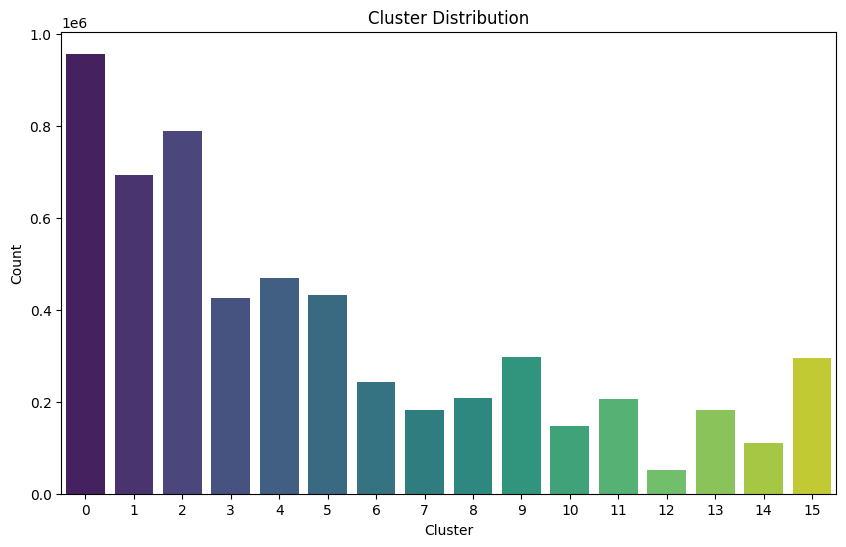

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kmodes
from kmodes.kmodes import KModes

# Removing the DepartureDelayGroups from the dataset
dataset_clustering = dataset.drop(['DepartureDelayGroups'], axis = 1)

# Perform clustering
kmode = KModes(n_clusters=16, init="random", n_init=5, verbose=1)
clusters = kmode.fit_predict(dataset_clustering)

# Plotting the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x=clusters, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Now, compare this with the distribution of DepartureDelayGroup

In [ ]:
import pandas as pd
dataset = pd.read_csv('cleaned_data.csv')
delay_groups = dataset['DepartureDelayGroups']

/tmp/ipykernel_34/3468638049.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_groups_count.index, y=delay_groups_count.values, palette='viridis')


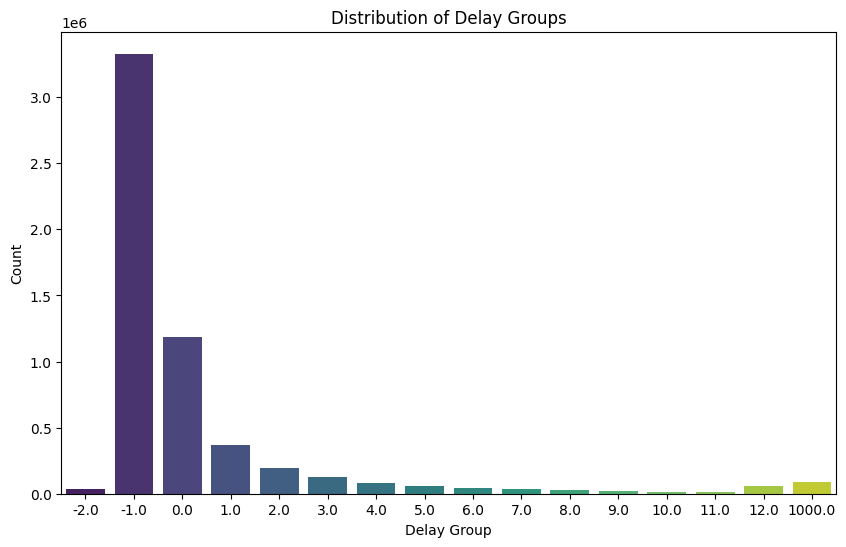

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of DepartureDelayGroups
delay_groups_count = delay_groups.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=delay_groups_count.index, y=delay_groups_count.values, palette='viridis')
plt.title('Distribution of Delay Groups')
plt.xlabel('Delay Group')
plt.ylabel('Count')
plt.show()

The bar chart displaying the "Distribution of Delay Groups" has been successfully plotted.

### Note: The clusters(X-Axis) for the Kmodes cluster distribution is NOT mapped directly to the categories in Delay Group. (i.e. cluster 1 != delay group -2.0).

By visually inspecting the cluster distribution, the spread in data is not as significant as in Delay Group. This would imply that the clustering model grouped a disproportionate number of datapoints together, straying away from the actual delay group distribution. This allows us to come to the conclusion that even taking all 6 predictors as a whole, there is insufficient similarities in characteristics of each delay group to create a highly accurate predictive model.

## Conclusion

In this mini-project, we initially sought to explore the contributing factors to one's flight status. Through the use of Naïve Bayes classification and Kmodes Clustering, we have come to the conclusion that there is no predictor (both individually or as a collective) that performs as a satisfactory predictor of flight status. 

This leads us to conclude that there are more external factors that have a big role in flight delay, for example, sudden onset of meteoritical conditions such as intense downpour or high crosswinds, or maybe even political issues resulting in strikes. All of which are out of the control of the customer flying. 

From a customers perspective, it is definitely discouraging to know that there is little they can do to decrease their chances of booking a non-delayed flight. 